In [19]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [20]:
FILE = "lattice_out.h5"
DATASET = "DS1"

LATTICE_SPEEDS = np.array([
    [0,  0],
    [0, -1],
    [1,  0],
    [0,  1],
    [-1,  0],
    [1, -1],
    [1,  1],
    [-1,  1],
    [-1, -1],
])

In [21]:
hf = h5py.File(FILE, 'r')
lattice = hf[DATASET]

shape_y, shape_x, Q = lattice.shape
print(f'Lattice is ({shape_x} by {shape_y})')

Lattice is (128 by 128)


In [22]:
rho = np.sum(lattice, axis=-1)
vel = (lattice @ LATTICE_SPEEDS) / rho[..., None]
energy = vel[..., 0]**2 + vel[..., 1]**2

np.max(vel)
np.mean(rho)

1.0000048080939443

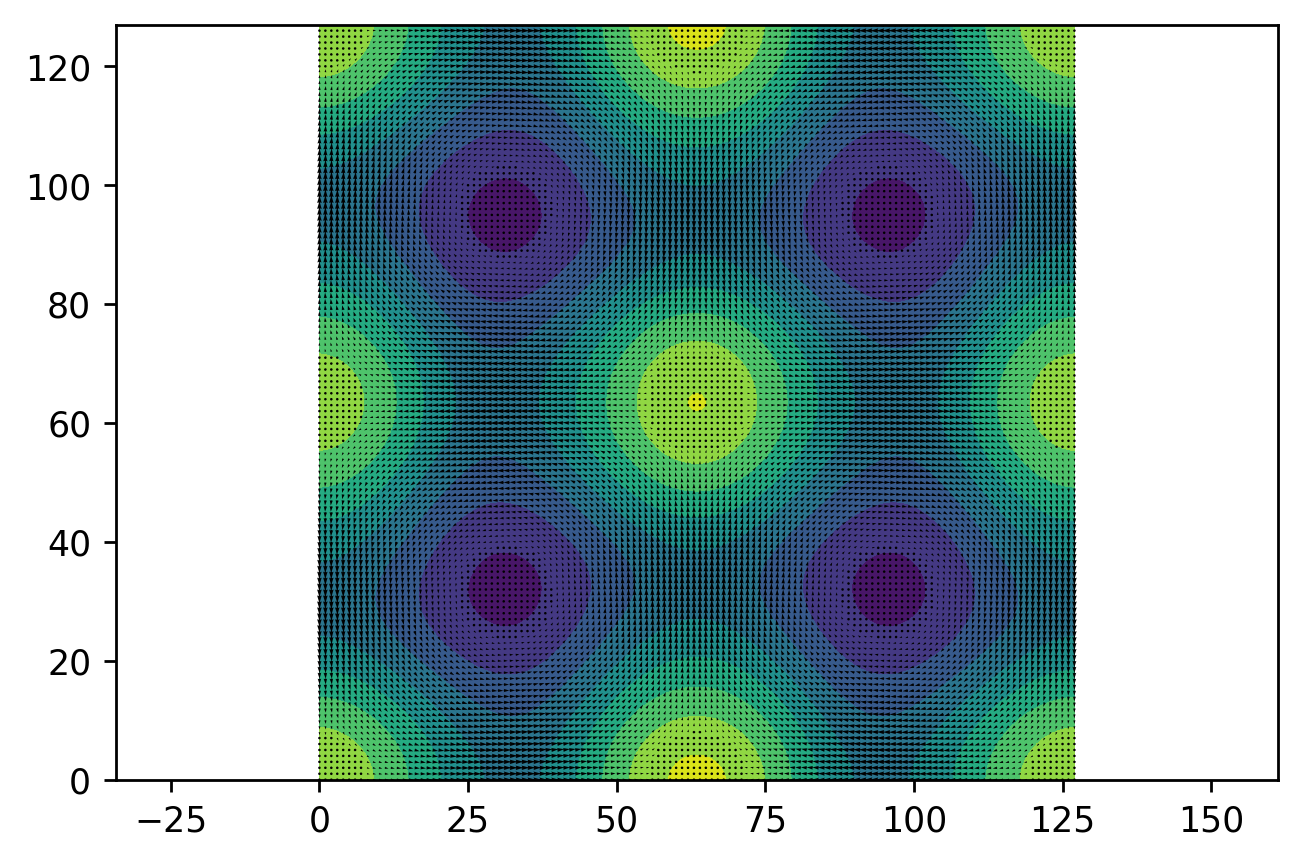

In [23]:
fig, ax = plt.subplots(dpi=250)
view = ax.contourf(rho)
# view = ax.contourf(np.sqrt(energy))
ax.axis('equal')
ax.quiver(vel[..., 0], vel[..., 1])
plt.show()


Mean density is 1.0


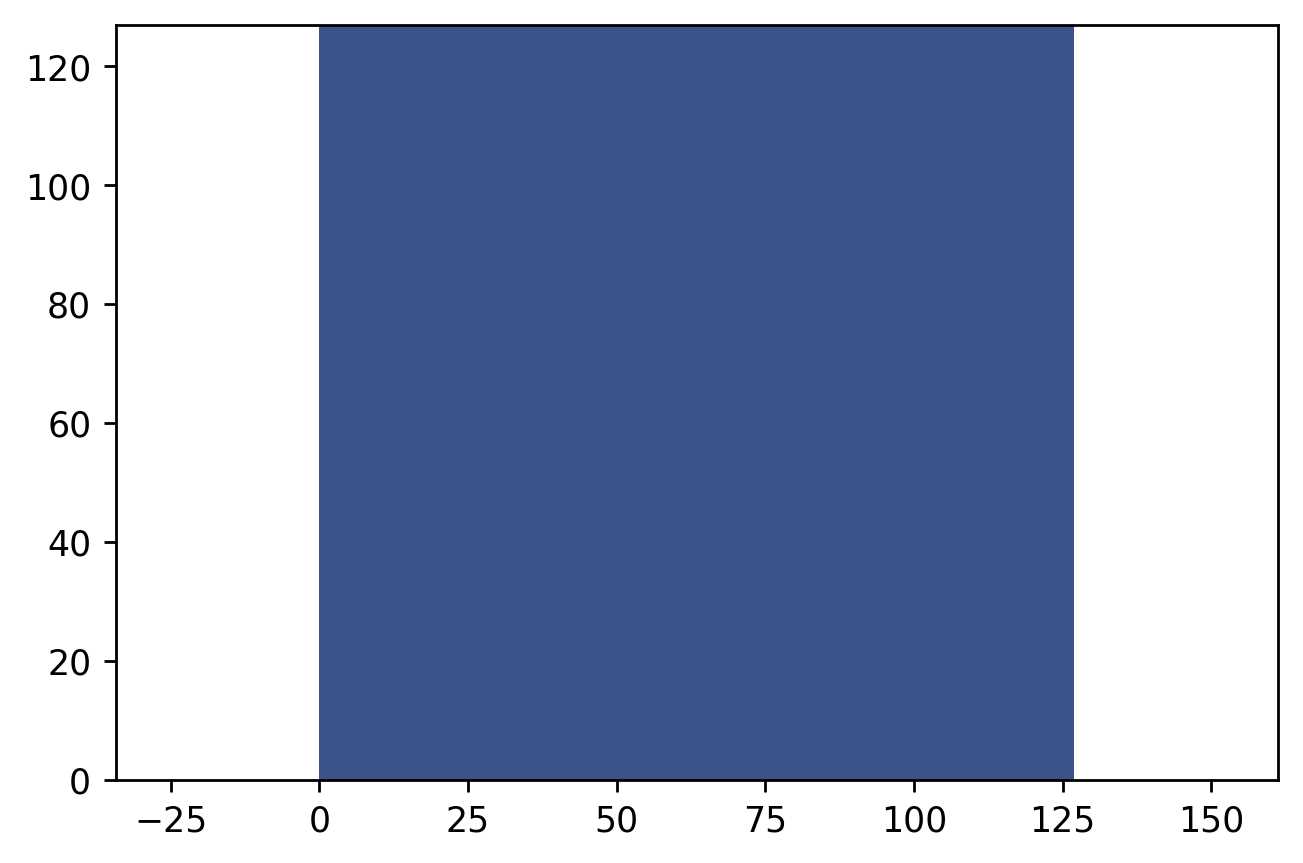

In [24]:
with h5py.File('output.h5') as file:
    data = file['density']
    print(f'Mean density is {np.mean(data[:, ...])}')
    fig, ax = plt.subplots(dpi=250)
    view = ax.contourf(data[0, ...])
    # view = ax.contourf(np.sqrt(energy))
    ax.axis('equal')
    plt.show()
